*Автор: Татьяна Рогович*

# Анализ данных в Python

## Введение в ML. Разведывательный анализ данных.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline

### Что такое разведывательный анализ данных или Exploratory Data Analysis (EDA?)

Разведывательный анализ данных помогает нам изучить данные, обработать пропущенные значения, убедиться, что данные корректно выглядят и в них нет ошибок, выбрать методы для обработки данных (например, стандартизация или OneHotEncoder), сделать первичный отбор признаков для модели.

По сути это работа с дескриптивными статистиками и визуализацией переменных

### Главные методы:

**1. Одномерный анализ **

Распределения и дескриптивные статистики для каждой переменной.

**2. Двумерный анализ **

Исследуем переменные попарно (зависимые и независимые переменные друг с другом, независимые переменные при подозрение на мультиколлинеарностью).

**3. Снижение размерности **

Поиск и выделение признаков, которые отвечают за наибольшую вариативных в данных. 



### 4 цели EDA

* Обнаружить паттерны
* Заметить аномалии
* Сформулировать гипотезы
* Проверить предположения

### Что исследуем во время EDA?

* Тренды
* Распределения
* Центральные тенденции и разброс
* Выбросы
* Корреляции
* Проверяем гипотезы
* Визуально исследуем данные

Сегодня мы работаем с достаточно известным набором данных House Prices Competition. 

Подробное описание данных и переменных по ссылке:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
    

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/rogovich/Data/master/data/house_data.csv')

In [4]:
data.shape

(1460, 81)

Мы работаем с частью данных, которые в соревновании применяются для тренировки модели. Всего 1460 наблюдений и 81 признак, из которых 36 количественных, 43 категориальных + id + целевая переменная SalePrice

Количественные признаки: 1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BsmtFinSF1, BsmtFinSF2, BsmtFullBath, BsmtHalfBath, BsmtUnfSF, EnclosedPorch, Fireplaces, FullBath, GarageArea, GarageCars, GarageYrBlt, GrLivArea, HalfBath, KitchenAbvGr, LotArea, LotFrontage, LowQualFinSF, MSSubClass, MasVnrArea, MiscVal, MoSold, OpenPorchSF, OverallCond, OverallQual, PoolArea, ScreenPorch, TotRmsAbvGrd, TotalBsmtSF, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold

Категориальные признаки: Alley, BldgType, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtQual, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, Fence, FireplaceQu, Foundation, Functional, GarageCond, GarageFinish, GarageQual, GarageType, Heating, HeatingQC, HouseStyle, KitchenQual, LandContour, LandSlope, LotConfig, LotShape, MSZoning, MasVnrType, MiscFeature, Neighborhood, PavedDrive, PoolQC, RoofMatl, RoofStyle, SaleCondition, SaleType, Street, Utilitif

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
data.info() # изучаем данные - пропущенные значения и типы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# выделяем количественные и категориальные переменные
numeric_features = data.select_dtypes(include=[np.number])
categorical_features = data.select_dtypes(include=[np.object])

In [9]:
numeric_features.iloc[:, :18].describe() # смотрим описательные статистики первых 18 количественных переменных

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000


## Количественные переменные: распределения


Отдельно всегда стоит изучить целевую переменную, которую собираемся предсказывать. В этом случае это цена дома.

In [10]:
y = data['SalePrice'] # выделеяем целевую переменную в вектор y

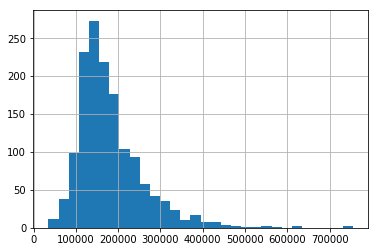

In [11]:
y.hist(bins = 30) # строим распределение

EDA можно проводить только методами pandas и matplotlib, но библиотека seaborn умеет немного больше. Например, мы можем посмотреть, как выглядит наше распределение относительно стандартных форм (например, нормального и лог-нормального).

C:\Users\rogov\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\rogov\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


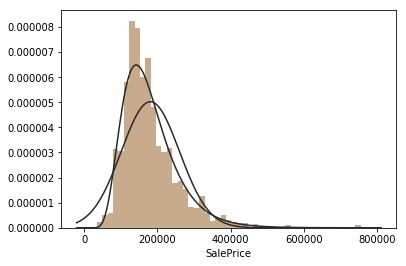

In [12]:
sns.distplot(y, kde=False, fit=st.norm)
sns.distplot(y, kde=False, fit=st.lognorm)

Мы видим, что наше распределение больше соответствует логарифмическому. Очень часто мы хотим нормировать такое распределение (могут быстрее сходиться алгоритмы, линейные модели в принципе предпологают, что переменные должны быть распределены нормально, корреляция легче интерпретируется и т.д.)

Давайте посмотрим, как будет выглядеть график цены, после применения лог-функции к нашему вектору.

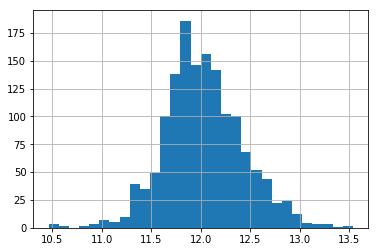

In [13]:
np.log(y).hist(bins = 30) # строим распределение

## Матрицы корреляции

Окей, вроде разобрались с одномерными распределениями. Кстати, изучая распределения можно как раз увидеть аномальные значения, решить, что с ними делать. Следующий шаг - это изучение зависимостей в данных.
Для этого обычно используют тепловую карту корреляций, попарные графики и графики рассеяния.

Для начала найдем коэффиценты попарных корреляций между количественными переменными.

[Подробнее про корреляцию](http://statistica.ru/theory/koeffitsient-korrelyatsii/)


In [14]:
correlation = numeric_features.corr()
correlation.head() # получаем датафрейм, где на пересечении рядов и колонок коэффиценты корреляции Пирсона для этих пар 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


In [15]:
print(correlation['SalePrice'].sort_values(ascending = False),'\n') # выводим коэффиценты попарной корреляции с SalePrice

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

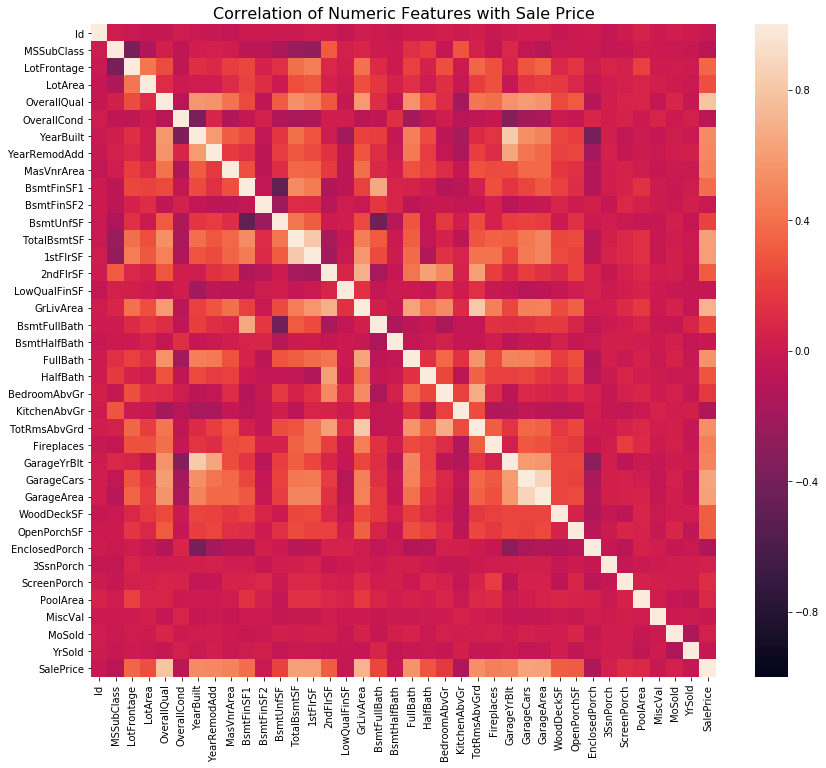

In [16]:
fig , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with Sale Price', size=16)

sns.heatmap(correlation, vmax=1.0, vmin = -1)

На таком графике можно увидеть признаки, которые сильно коррелируют с целевой переменной, а значит обладают большим предсказательным потенциалом. А также найти переменные, которые сильно коррелируют между собой, и избавиться от части из них в финальной модели. Здесь нас интересуют значения ближе к - 1 и 1.


Мы сразу видим, что есть два кластера с потенциальной мультиколлинеарностью (наличие линейной зависимости между объясняющими переменными (факторами) регрессионной модели) - 'TotalBsmtSF' и '1stFlrSF', и переменные 'GarageX'.

Касаемо 'SalePrice', мы видим, что 'GrLivArea' и 'OverallQual' сильнее всего коррелируют с ценой. Давайте попробуем рассмотреть наши данные подбробнее.

Для начала отфильтруем по индексу 10 топ-корреляций с ценой (мы берем 11, потому что тут еще включается корреляция переменной самой с собой.)

In [17]:
correlation['SalePrice'].sort_values(ascending = False).head(11).index # так мы уже умеем это делать

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [18]:
correlation.nlargest(11,'SalePrice')['SalePrice'].index # альтернативный вариант

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [19]:
cols = correlation.nlargest(11,'SalePrice')['SalePrice'].index # сохраняем интересующие нас колонки для фильтрации

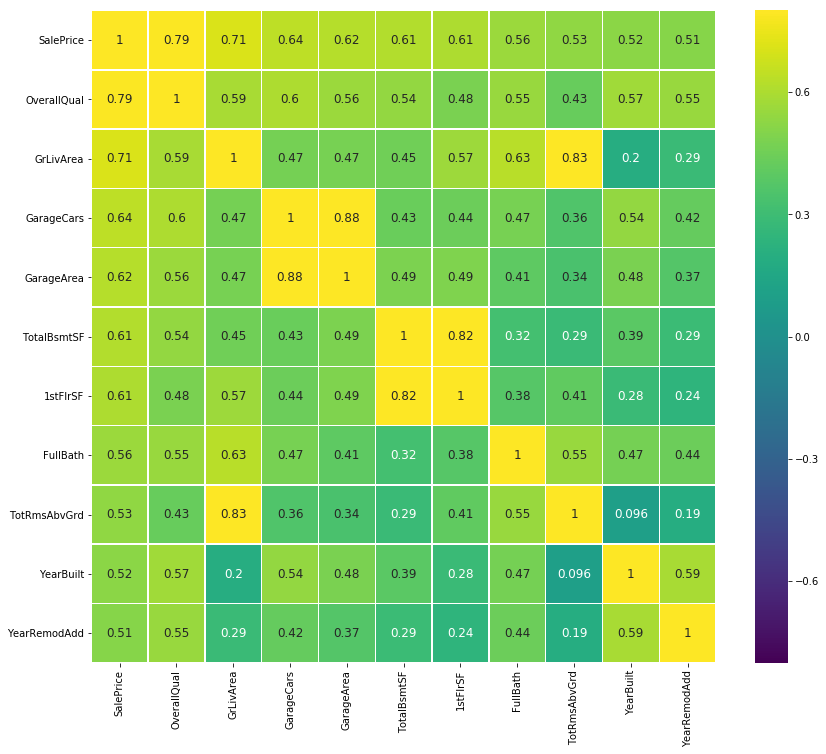

In [20]:
fig , ax = plt.subplots(figsize = (14,12))
sns.heatmap(correlation.loc[cols, cols], vmax=0.8, vmin = -0.8, linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

Из такой приближенной тепловой карты, мы видим, что переменные, которые мы подозревали, действительно коррелируют между собой. И что цена действительно сильнее всего связана с  'GrLivArea' и 'OverallQual'

### Промежуточные выводы

* 'OverallQual' и 'GrLivArea' сильно коррелируют с  'SalePrice'.
* 'GarageCars' и 'GarageArea' сильно коррелируют между собой. Что логично, потому что количество машин, помещающихся в гараж, по сути фукнция площади гаража. Для будущей модели мы можем использовать одну переменную из двух (например, ту, которая сильнее коррелирует с ценой)
* 'TotalBsmtSF' и '1stFloor' тоже выглядят близнецами.
* Как и 'TotRmsAbvGrd' и 'GrLivArea'.

## Попарные визуализации
С помощью матрицы корреляций мы нашли переменные, которые сильнее всего коррелируют с ценой дома. Теперь с помощью попарных графиков, мы можем лучше изучить эти взаимосвязи.
Для начала удалим по переменной из пар, где мы обнаружили мультиколлинеарность.

In [21]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [22]:
new_cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']

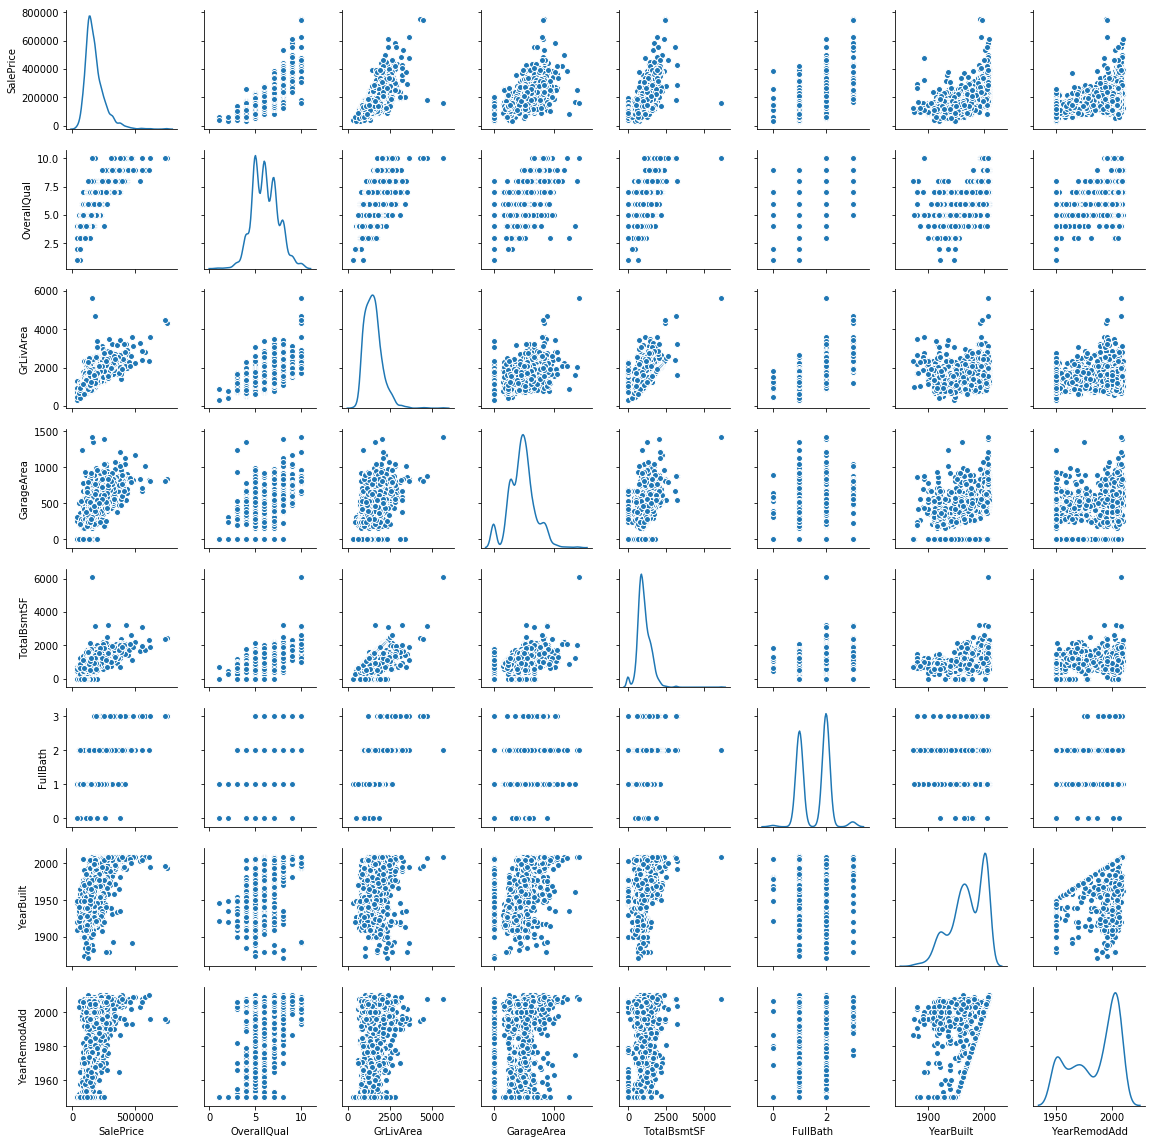

In [23]:
sns.pairplot(data[new_cols],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

Кстати, выше я уже упоминала, что один из кейсов для лог-нормирования распределение - оценка взаимосвязи в графиках рассеяния. Давайте посмотрим, как это влияет.

In [24]:
data['logSalePrice'] = np.log(data['SalePrice']) # создаем новую переменную с логарифмом цены
new_cols_log = ['logSalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd']

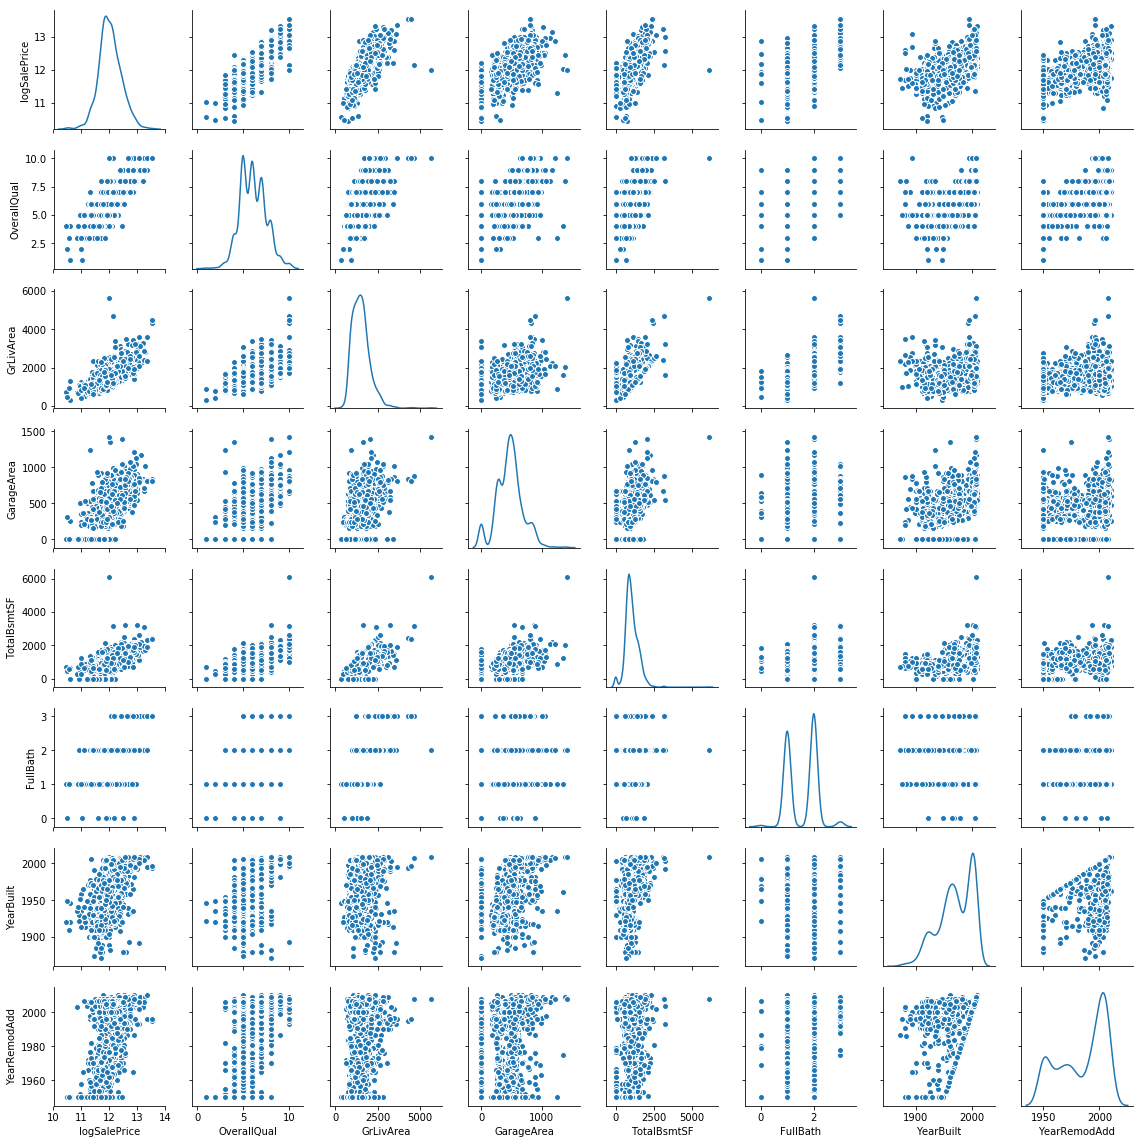

In [25]:
sns.pairplot(data[new_cols_log],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

Видим, что многие графики приняли более линейную форму (например цена и OverallQuall).

### Промежуточные выводы

* Например, мы видим как связаны переменные 'TotalBsmtSF' и 'GrLiveArea'. Мы можем увидеть диагональ, которая как бы делить область координат на секторы, и все наблюдения сконцетрированы ниже нее. Это логично, потому что мы ожидаем, что площадь подвального помещения будет меньше или равна площади дома.

* Если посмострим на взаимосзвять 'SalePrice' и 'YearBuilt', то увидим, что отношения между ними экспоненциальные - в последние годы цены растут быстрее по отношению к прошедшим годам. Кстати, это одна из причин, почему коэффициент корреляции Пирсона был невысокий - эта связь не линейная.


## Попарные ящики с усами для категориальных переменных

В том случае, если одна из наших переменных категориальная, а вторая непрервыная, лучше использовать ящики с усами или скрипичные графики, чтобы сравнить распределения непрерывной переменной внутри категорий.

[Подробнее про ящик с усами](https://datavizcatalogue.com/RU/metody/diagramma_razmaha.html)

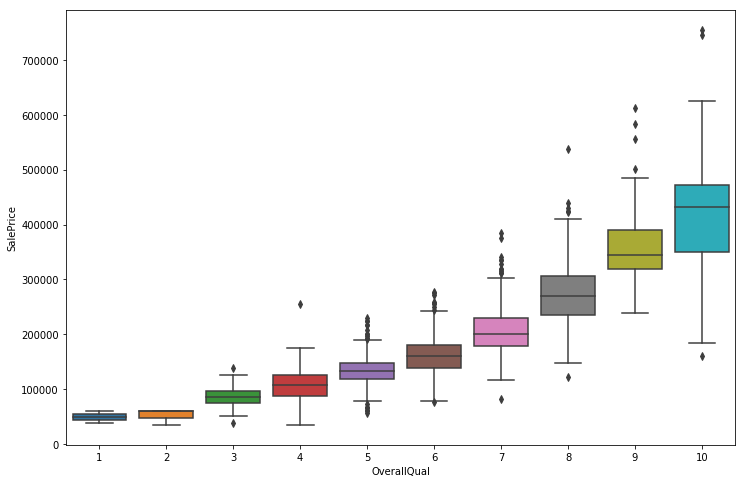

In [26]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data['OverallQual'], data["SalePrice"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

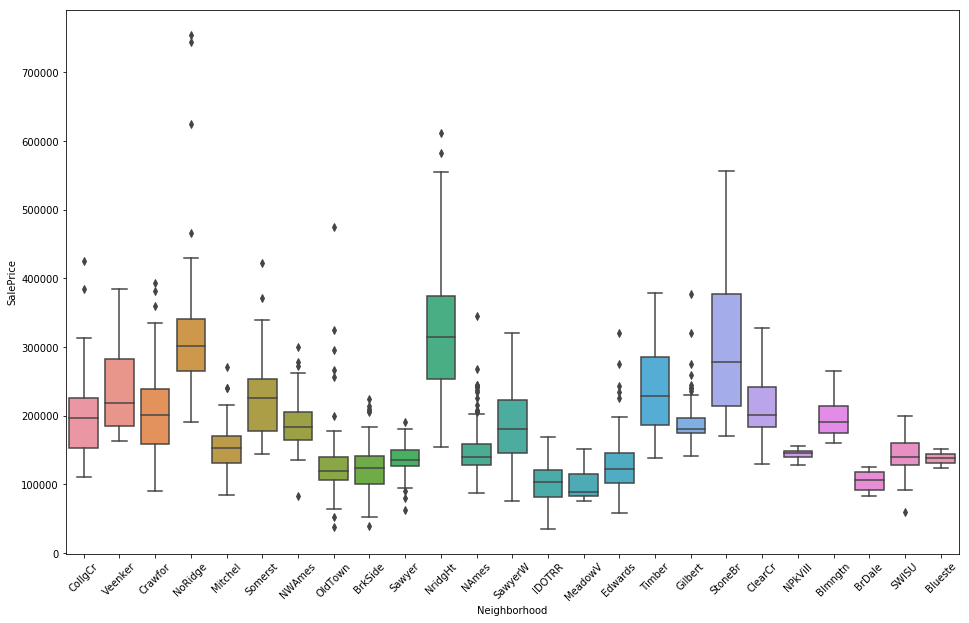

In [28]:
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x='Neighborhood', y="SalePrice", data=data)
plt.xticks(rotation=45)

Кстати, чтобы оценить распределение категориальной переменной, мы обычно используем бар-чарт, который показывает, сколько наблюдений попадает в каждую категорию.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

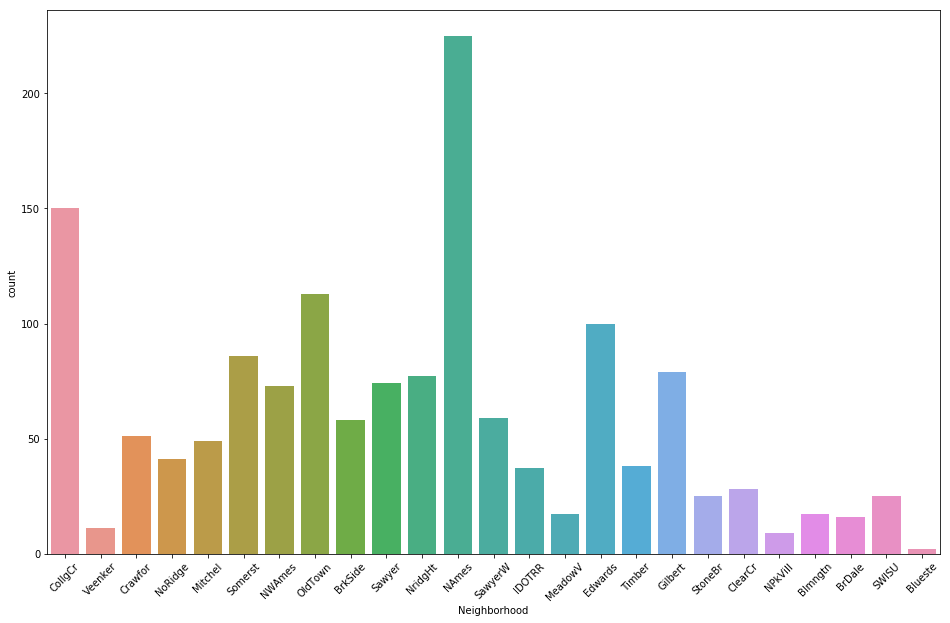

In [29]:
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.countplot(x='Neighborhood', data=data)
plt.xticks(rotation=45)

Мы видим, что у нас есть несколько райнов с похожими ценами. Это, например, можно использовать для снижения размерности - объединять переменную Neighborhood в более крупные категории.

Также в `seaborn` если два вида графиков, которые поддерживат так называемый "фасетинг" — разбивку по признакам. Это `.relplot()` и `.catplot()`. Первый мы используем для работы с количественными переменными, а второй — с категориальными — внутри этих функций мы можем выбирать, какой тип графика мы хотим использовать. Подробнее можно почитать в документации [здесь](https://seaborn.pydata.org/generated/seaborn.relplot.html) и [здесь](https://seaborn.pydata.org/generated/seaborn.catplot.html?highlight=catplot#seaborn.catplot).

Давайте построим график зависимости цены дома от общей площади, где за категории у нас будет отвечать район (`Neighborhood`), за цвет — `OverallQual`, а за размер — площадь гаража. Также зададим параметр `col_wrap`, который задает количество графиков в одном ряду.

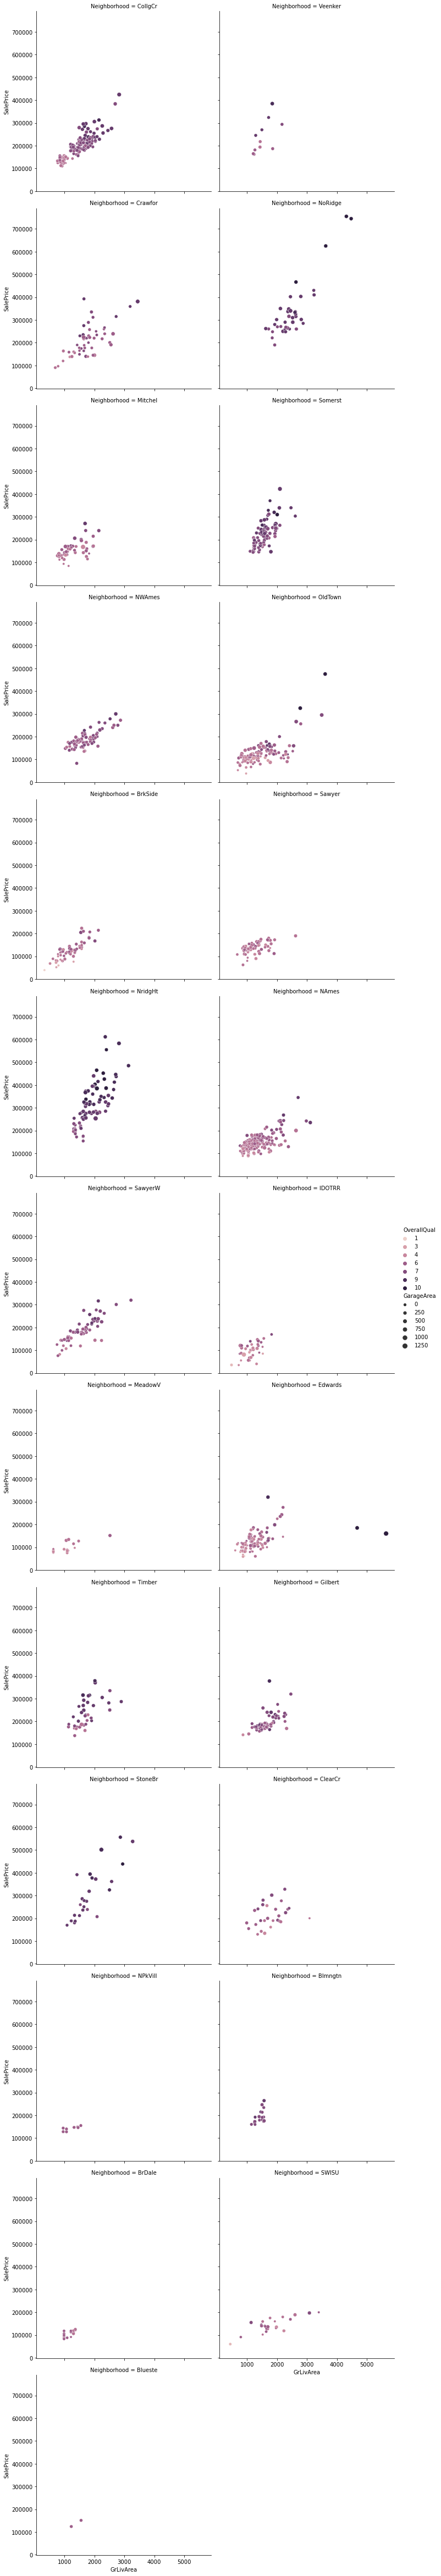

In [7]:
sns.relplot(data=data,
            kind='scatter',
            x='GrLivArea',
            y='SalePrice',
            col='Neighborhood',
            hue='OverallQual',
            size='GarageArea',
            col_wrap=2)

Таким образом мы теперь можем изучать зависимость цены от категориальных переменных. Здесь в основном идет речь про создание новых признаков за счет выделения в отдельные переменные категорий, которые значительно отличаются от других (например, деревянные крыши). Или уменьшение размерности внутри категорий, а также работа с выбросами.

## Дополнительные материалы
Также существуют специальные библиотеки для EDA. Например, pandas_profiling. Ее нет в стандартном наборе Анаконды, но ее легко установить через pip. 
[Статья на хабре](https://habr.com/ru/company/ruvds/blog/451478/)